| ESCUELA POLITÉCNICA NACIONAL  |                              | **Proyecto** |
|-------------------------------|------------------------------|--------------|
| **Estructuras de Datos y Algoritmos II – Computación**     | |       1      |
| NOMBRES: Brandon Ismael Freire|                              |              |

### 1. Objetivos

- Explicar los conceptos fundamentales de DFS, sus propiedades y cómo se aplica en grafos, tanto en la versión recursiva como en la implementación con pila.

- Desarrollar el código de DFS usando Python, ya sea de manera recursiva o mediante el uso de una pila, garantizando que el algoritmo recorra el grafo correctamente desde el nodo de inicio.

- Construir el árbol DFS a partir del recorrido del algoritmo, y asegurarse de que represente a los nodos conectados desde el nodo de inicio (Start), destacando la estructura y el orden de descubrimiento de los nodos.

- Aplicar el algoritmo a un ejemplo de grafo, similar al visto en clase, y validar que el recorrido y la generación del árbol DFS sean correctos.

- Identificar y explicar las estructuras de datos (como listas o pilas) necesarias para realizar el seguimiento de los nodos visitados y el camino seguido durante el recorrido, evaluando su importancia en la implementación eficiente del algoritmo y la obtención del DFS Tree.


## 2. Introducción

En el análisis, desarrollo y procesamiento de grafos, el algoritmo de Búsqueda en Profundidad (DFS, por sus siglas en inglés, Depth-First Search) tiene gran relevancia debido a su capacidad para explorar completamente cada componente conectado de un grafo, abarcando desde el nodo de inicio hasta cada uno de sus nodos alcanzables. DFS es un enfoque de recorrido que se adentra tanto como sea posible en cada rama del grafo antes de retroceder, siendo particularmente útil para la generación de árboles de expansión, detección de ciclos, y para problemas que requieren analizar todas las rutas posibles entre nodos.

Este informe tiene como objetivo implementar el algoritmo DFS, generando el árbol de recorrido DFS (DFS Tree) a partir de un nodo inicial especificado, denominado "Start". La implementación incluirá estructuras auxiliares que permitirán realizar el seguimiento de los nodos visitados y el camino de descubrimiento, utilizando una pila o recursividad, de acuerdo con las estrategias de DFS. Además, el algoritmo se pondrá a prueba mediante ejemplos prácticos para validar su correcta ejecución y su capacidad de explorar completamente los nodos conectados al nodo de inicio.

Con ello, se busca profundizar en la comprensión del algoritmo DFS y sus aplicaciones en grafos, mostrando no solo su funcionamiento teórico, sino también su aplicabilidad práctica en problemas de recorrido de grafos.

## 3. Ejercicios planteados y/o programas implementados

### a) Genere el árbol DFS (DFS Tree) para el grafo G, sabiendo que el nodo de inicio es Start. Ese sería el componente conectado que contiene al nodo Start. Implemente el algoritmo DFS (recursivo o con uso de pila) y use las estructuras auxiliares necesarias.

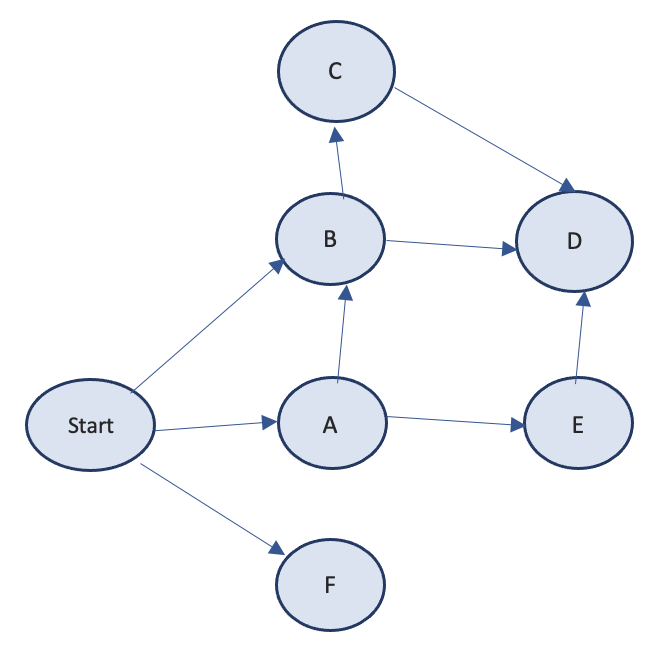


In [1]:
print()

### b) Nota: puede probar su algoritmo con el ejemplo visto en clase para probar el recorrido correcto de las ejecuciones DFS